In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
uber = pd.read_csv('uber.csv')

In [3]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
uber_2 = uber.drop(['Unnamed: 0','key'],axis=1)
uber_2.dropna(axis=0,inplace=True)

In [7]:
uber_2.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
def haversine (lon_1, lon_2, lat_1, lat_2):

    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians


    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1


    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))

    return km


In [9]:
uber_2['Distance']= haversine(uber_2['pickup_longitude'],uber_2['dropoff_longitude'],
                             uber_2['pickup_latitude'],uber_2['dropoff_latitude'])

uber_2['Distance'] = uber_2['Distance'].astype(float).round(2)    # Round-off Optional

In [10]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

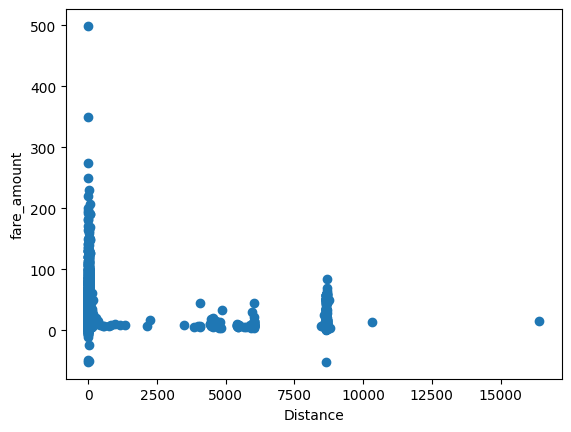

In [11]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [12]:
uber_2.drop(uber_2[uber_2['Distance'] > 60].index, inplace = True)
uber_2.drop(uber_2[uber_2['Distance'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] == 0].index, inplace = True)
uber_2.drop(uber_2[uber_2['fare_amount'] < 0].index, inplace = True)

In [13]:
uber_2.drop(uber_2[(uber_2['fare_amount']>100) & (uber_2['Distance']<1)].index, inplace = True )
uber_2.drop(uber_2[(uber_2['fare_amount']<100) & (uber_2['Distance']>100)].index, inplace = True )

In [14]:
uber_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193481 non-null  float64
 1   pickup_datetime    193481 non-null  object 
 2   pickup_longitude   193481 non-null  float64
 3   pickup_latitude    193481 non-null  float64
 4   dropoff_longitude  193481 non-null  float64
 5   dropoff_latitude   193481 non-null  float64
 6   passenger_count    193481 non-null  int64  
 7   Distance           193481 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


Text(0, 0.5, 'fare_amount')

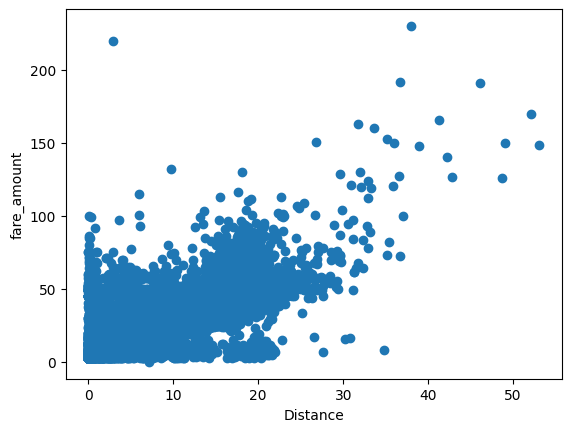

In [15]:
plt.scatter(uber_2['Distance'], uber_2['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [16]:
uber_2['pickup_datetime'] = pd.to_datetime(uber_2['pickup_datetime'])

uber_2['Year'] = uber_2['pickup_datetime'].apply(lambda time: time.year)
uber_2['Month'] = uber_2['pickup_datetime'].apply(lambda time: time.month)
uber_2['Day'] = uber_2['pickup_datetime'].apply(lambda time: time.day)
uber_2['Day of Week'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Day of Week_num'] = uber_2['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_2['Hour'] = uber_2['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_2['Day of Week'] = uber_2['Day of Week'].map(day_map)

uber_2['counter'] = 1

In [17]:
uber_2['pickup'] = uber_2['pickup_latitude'].astype(str) + "," + uber_2['pickup_longitude'].astype(str)
uber_2['drop off'] = uber_2['dropoff_latitude'].astype(str) + "," + uber_2['dropoff_longitude'].astype(str)

In [18]:
uber_2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,24,Mon,0,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"


Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [29674, 29094, 30712, 31138, 30365, 29065, 13433]


<BarContainer object of 7 artists>

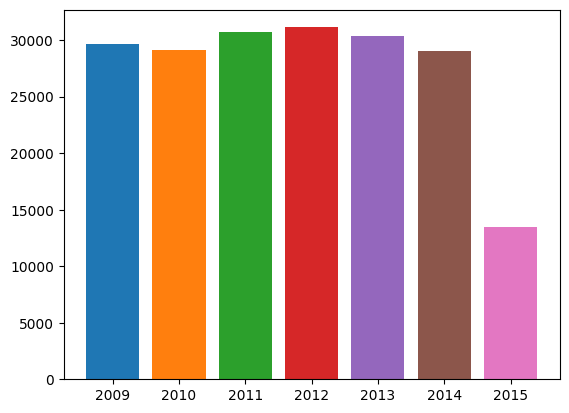

In [19]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(2009, 2016):
    x = uber_2.loc[uber_2['Year'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)

plt.bar(year, no_of_trips, color=colors)

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [17126, 16141, 18165, 18004, 18259, 17210, 14583, 13664, 14772, 15690, 14824, 15043]


<BarContainer object of 12 artists>

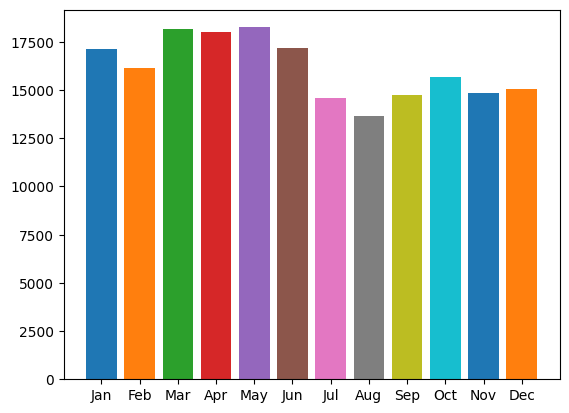

In [20]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(1, 13):
    x = uber_2.loc[uber_2['Month'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)

plt.bar(month, no_of_trips, color=colors)

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [24377, 27236, 28084, 29041, 29865, 29306, 25572]


<BarContainer object of 7 artists>

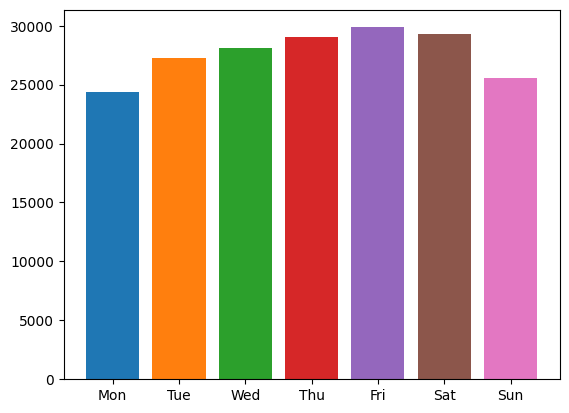

In [21]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(0, 7):
    x = uber_2.loc[uber_2['Day of Week_num'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

plt.bar(day, no_of_trips, color=colors)

<Axes: title={'center': 'No of trips vs Months'}, xlabel='January, 2009 - June, 2015', ylabel='No of Trips'>

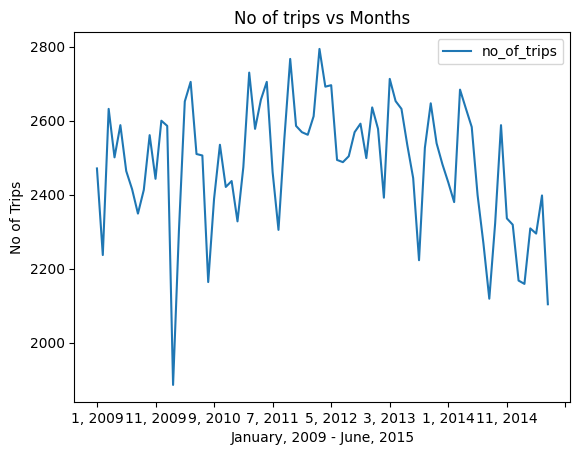

In [22]:
year_vs_trips = uber_2.groupby(['Year','Month']).agg(
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_vs_trips['avg_no_of_trips'] = year_vs_trips['no_of_trips']/30
year_vs_trips['month_year'] = year_vs_trips['Month'].astype(str) +", "+ year_vs_trips['Year'].astype(str)


year_vs_trips = year_vs_trips.reset_index()

year_vs_trips.head()


year_vs_trips.plot(kind='line',x='month_year',y='no_of_trips', xlabel='January, 2009 - June, 2015',
    ylabel='No of Trips', title='No of trips vs Months')

In [23]:
import seaborn as sns

df_1 = uber_2[['Distance', 'Day of Week_num', 'Hour']].copy()

df_h = df_1.copy()

df_h = df_h.groupby(['Hour', 'Day of Week_num']).mean()
df_h = df_h.unstack(level=0)

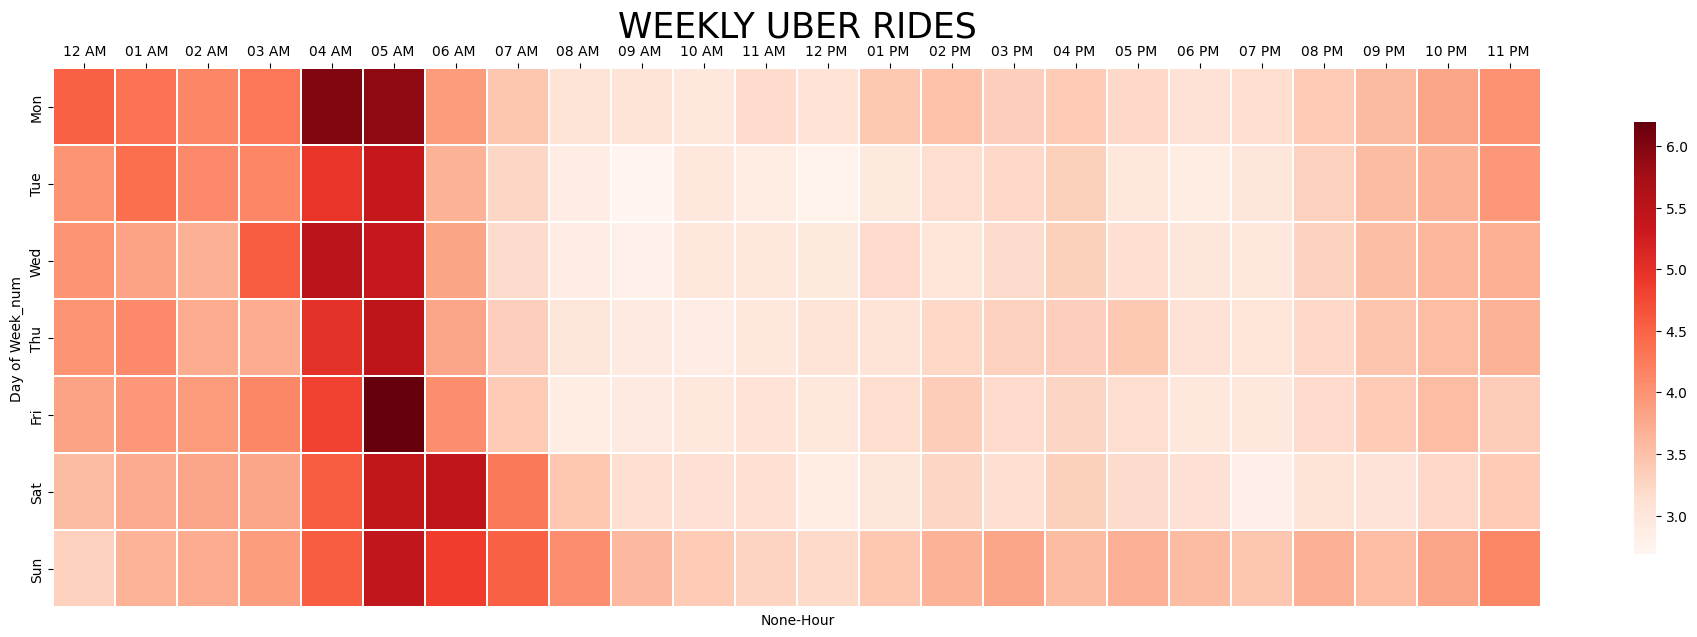

In [24]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(df_h, cmap="Reds",
           linewidth=0.3, cbar_kws={"shrink": .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ',
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) + .5, labels=xticks_labels)
plt.yticks(np.arange(7) + .5, labels=yticks_labels)

ax.xaxis.tick_top()

title = 'Weekly Uber Rides'.upper()
plt.title(title, fontdict={'fontsize': 25})

plt.show()

In [25]:
import statistics as st

print("Mean of fare prices is % s "
         % (st.mean(uber_2['fare_amount'])))

print("Median of fare prices is % s "
         % (st.median(uber_2['fare_amount'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(uber_2['fare_amount'])))

Mean of fare prices is 11.311137476031238 
Median of fare prices is 8.5 
Standard Deviation of Fare Prices is 9.501354886915946 


In [26]:
import statistics as st

print("Mean of Distance is % s "
         % (st.mean(uber_2['Distance'])))

print("Median of Distance is % s "
         % (st.median(uber_2['Distance'])))

print("Standard Deviation of Distance is % s "
                % (st.stdev(uber_2['Distance'])))

Mean of Distance is 3.3573488352861522 
Median of Distance is 2.18 
Standard Deviation of Distance is 3.5995030824386185 


In [28]:
corr = uber_2.corr()

corr.style.background_gradient(cmap='BuGn')

ValueError: could not convert string to float: 'Thu'

In [29]:
X = uber_2['Distance'].values.reshape(-1, 1)        #Independent Variable
y = uber_2['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [30]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.40219535]
 [-0.38103792]
 [ 0.16905527]
 ...
 [-0.56087608]
 [ 1.00794739]
 [ 0.54988902]]
[[-0.46507736]
 [-0.24822682]
 [ 0.46904801]
 ...
 [-0.73475045]
 [ 0.55801233]
 [ 0.78876354]]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.8032840


In [33]:
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}

from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

/usr/local/lib/python3.10/dist-packages/tabulate/__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)
/usr/local/lib/python3.10/dist-packages/tabulate/__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


+--------------+--------------+
|       Actual |    Predicted |
|--------------+--------------|
| -0.804187    | -0.701677    |
| -0.507983    | -0.537036    |
| -0.592612    | -0.621851    |
| -0.761872    | -0.641808    |
|  0.232528    |  0.181395    |
| -0.592612    | -0.300054    |
| -0.254093    | -0.142897    |
| -0.719557    | -0.621851    |
| -0.560876    | -0.549509    |
| -0.507983    | -0.452222    |
| -0.666663    | -0.537036    |
| -0.677242    | -0.604389    |
|  3.56482     |  4.18266     |
| -0.560876    | -0.464694    |
|  0.0421107   | -0.40233     |
| -0.349302    | -0.364912    |
| -0.634927    | -0.417298    |
|  0.761463    |  0.193868    |
| -0.0848339   | -0.252657    |
| -0.254093    | -0.160359    |
| -0.666663    | -0.596906    |
| -0.507983    | -0.280097    |
| -0.719557    | -0.679226    |
|  0.0738468   | -0.285086    |
| -0.634927    | -0.519574    |
| -0.296408    | -0.322505    |
| -0.042519    |  0.316101    |
| -0.507983    | -0.427276    |
|  0.348

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2419680177549188
Mean Squared Error: 0.18309569736741582
Root Mean Squared Error: 0.4278968302843757


In [35]:
print(l_reg.intercept_)
print(l_reg.coef_)

[5.68314148e-06]
[[0.89727752]]


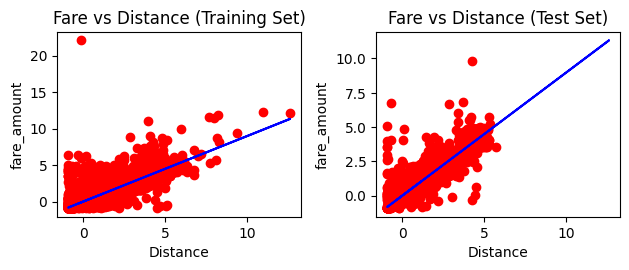

In [36]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()